In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *
import nltk
# nltk.download()

In [37]:
# Import father related words
dep, gov = get_corenlp_father_words(1000)

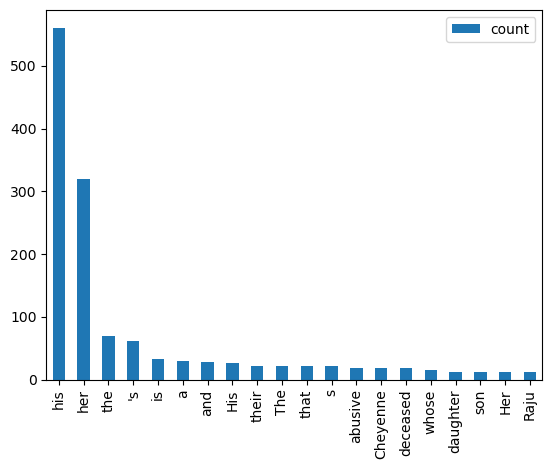

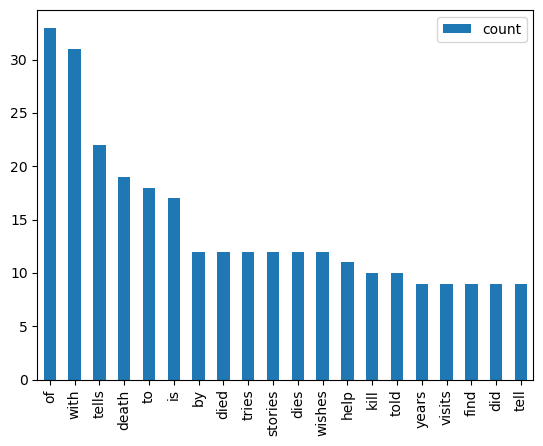

In [38]:
# Read the dicts to data frames with columns word and count
dep_df = pd.DataFrame.from_dict(dep, orient='index', columns=['count'])
gov_df = pd.DataFrame.from_dict(gov, orient='index', columns=['count'])

# Sort the data frames by count
dep_df = dep_df.sort_values(by=['count'], ascending=False)
gov_df = gov_df.sort_values(by=['count'], ascending=False)

# Plot the top 20 words
dep_df[:20].plot(kind='bar')
plt.show()
gov_df[:20].plot(kind='bar')
plt.show()


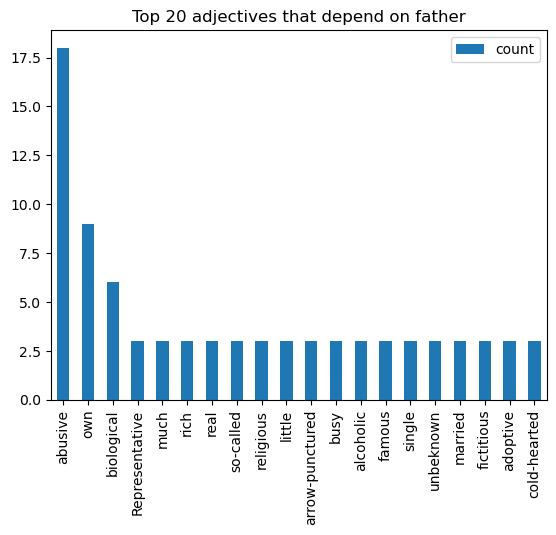

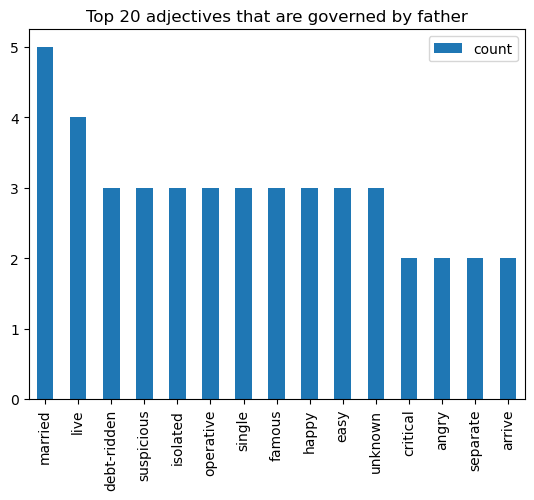

In [39]:
# Use nltk and pos_tag to get the pos (part of speech) of the words
dep_df['pos'] = dep_df.index.map(lambda x: nltk.pos_tag([x])[0][1])
gov_df['pos'] = gov_df.index.map(lambda x: nltk.pos_tag([x])[0][1])

# Filter the data frames to only keep the adjectives
dep_df = dep_df[dep_df['pos'] == 'JJ']
gov_df = gov_df[gov_df['pos'] == 'JJ']

# Plot the data
dep_df.head(20).plot.bar()
title = 'Top 20 adjectives that depend on father'
plt.title(title)
plt.show()

gov_df.head(20).plot.bar()
title = 'Top 20 adjectives that are governed by father'
plt.title(title)
plt.show()

In [4]:
characters = get_characters()
characters.head()

,WikiID,MovieID,ReleaseDate,CharacterName,ActorDOB,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAge,FreebaseCharacterActorMapId,FreebaseCharacterID,FreebaseActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [ ]:
movies = get_movies()

In [ ]:
# Plot countries and primary genres
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

movies["Country"].value_counts().head(20).plot(kind='bar', logy=True, ax=ax[0])
genres = movies["Genres"]
# Only take the first genre
genres = genres.apply(lambda x: [g.name for g in x][0])
genres.value_counts().head(20).plot(kind='bar', logy=True, ax=ax[1])

In [ ]:
# Plot the number of movies per year
movies["Year"].value_counts().sort_index().plot(kind='bar', logy=True, figsize=(20, 10))

In [ ]:
# Plot the mean and median gross revenue per year with and without inflation adjustment
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
movies.groupby("Year")["BoxOfficeRevenue"].mean().plot(kind='line', logy=True, ax=ax[0])
movies.groupby("Year")["BoxOfficeRevenue"].median().plot(kind='line', ax=ax[0])
plt.legend(["Mean", "Median"])
ax[0].set_title("Box office revenue per year")

movies.groupby("Year")["InflationAdjustedRevenue"].mean().plot(kind='line', logy=True, ax=ax[1])
movies.groupby("Year")["InflationAdjustedRevenue"].median().plot(kind='line', ax=ax[1])
plt.legend(["Mean", "Median"])
ax[1].set_title("Inflation adjusted box office revenue per year")

In [ ]:
plots = get_plot_summaries()
plots.head()

In [4]:
imdb_movies = get_imdb_movies()
imdb_movies.head()
print("Imdb movies count", imdb_movies.shape[0])
# Filter the movies with non numeric budgets
imdb_movies = imdb_movies[imdb_movies["budget"].apply(lambda x: x.isnumeric())]
# make budget a float
imdb_movies["budget"] = imdb_movies["budget"].apply(lambda x: float(x))
# filter out zero budget and revenue movies
imdb_movies = imdb_movies[(imdb_movies["budget"] > 0) & (imdb_movies["revenue"] > 0)]
imdb_movies["profit"] = imdb_movies["revenue"] - imdb_movies["budget"]

print(imdb_movies["profit"].shape[0], "movies with non zero budget and revenue")

# Count rows with negative profit
len(imdb_movies[imdb_movies["profit"] < 0])  / len(imdb_movies)

/home/anton/Desktop/ada/ada-2022-project-adamax/src/helpers.py:76: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'{imdbPath}/movies_metadata.csv', index_col=False)


Imdb movies count 45466
5381 movies with non zero budget and revenue


0.29827169671064857

In [5]:
# Get movies with negative profits
neg_profits = imdb_movies[imdb_movies["profit"] < 0].sort_values(by="profit", ascending=True)
neg_profits[["original_title", "profit"]].head(20)

,original_title,profit
21175,The Lone Ranger,-165710090.0
7226,The Alamo,-119180039.0
16788,Mars Needs Moms,-111007242.0
44337,Valerian and the City of a Thousand Planets,-107447384.0
2711,The 13th Warrior,-98301101.0
5389,The Adventures of Pluto Nash,-92896027.0
1901,Metropolis,-91969578.0
14,Cutthroat Island,-87982678.0
41491,Live by Night,-85321445.0
11376,Flushed Away,-84540684.0


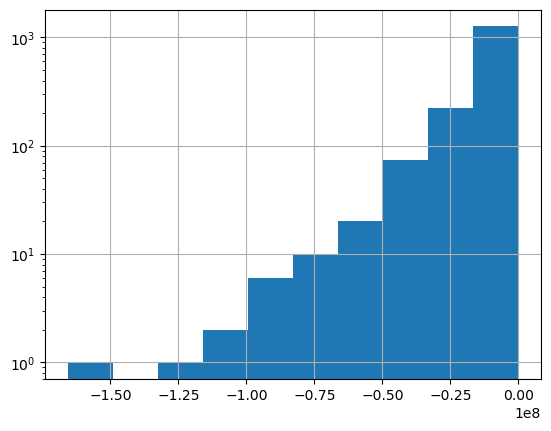

In [6]:
# Plot negative profits in a histogram
neg_profits["profit"].hist()
plt.yscale("log")

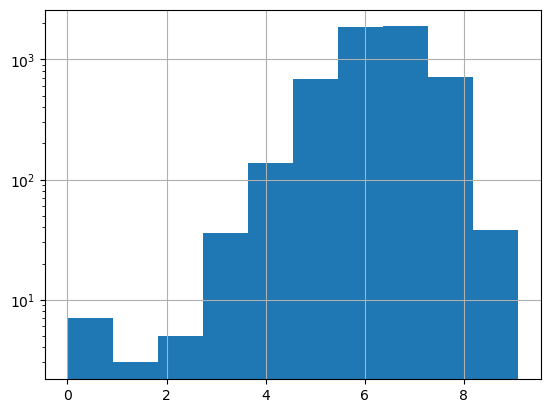

In [7]:
# Plot a histogram of the ratings
imdb_movies["vote_average"].hist()
plt.yscale("log")

/home/anton/Desktop/ada/ada-2022-project-adamax/src/helpers.py:76: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'{imdbPath}/movies_metadata.csv', index_col=False)


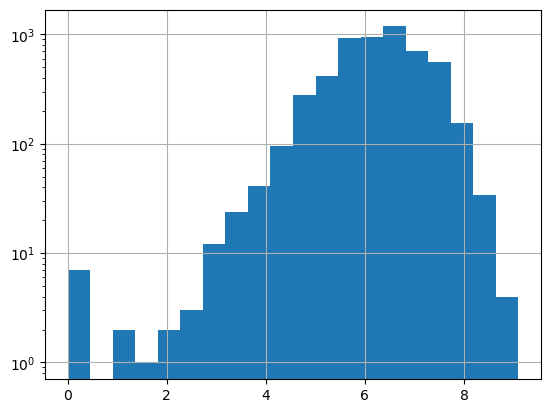

In [31]:
imbd_movies = get_imdb_movies()
imbd_movies.head()

# Plot a histogramn of the vote average
imdb_movies["vote_average"].hist(bins=20)
plt.yscale("log")

In [9]:
# Show the 20 worst rated movies
imdb_movies.sort_values(by="vote_average", ascending=True)[["original_title", "vote_average"]].head(50)

,original_title,vote_average
15732,The End of Poverty?,0.0
34275,Duniyadari,0.0
16646,Lucky Lady,0.0
2842,Naturally Native,0.0
39716,The Cherry Orchard,0.0
9773,Bopha!,0.0
4958,Honky Tonk Freeway,0.0
43392,Королёв,1.0
45422,Антидурь,1.0
43515,Кавказская пленница!,1.7


In [12]:
# Plot the genres of the movies with negative profits
# neg_profits["genres"].value_counts().plot(kind='bar', logy=True)
neg_profits.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,profit
21175,False,NaN,255000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://disney.go.com/the-lone-ranger/,57201,tt1210819,en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,...,89289910.0,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Never Take Off the Mask,The Lone Ranger,False,5.9,2361.0,-165710090.0
7226,False,NaN,145000000.0,"[{'id': 37, 'name': 'Western'}, {'id': 36, 'na...",NaN,10733,tt0318974,en,The Alamo,Based on the 1836 standoff between a group of ...,...,25819961.0,137.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,You will never forget,The Alamo,False,5.8,108.0,-119180039.0
16788,False,NaN,150000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://disney.go.com/disneypictures/marsneedsm...,50321,tt1305591,en,Mars Needs Moms,"When Martians suddenly abduct his mom, mischie...",...,38992758.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mom needs a little space.,Mars Needs Moms,False,5.6,202.0,-111007242.0
44337,False,NaN,197471676.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",NaN,339964,tt2239822,en,Valerian and the City of a Thousand Planets,"In the 28th century, Valerian and Laureline ar...",...,90024292.0,137.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Valerian and the City of a Thousand Planets,False,6.7,905.0,-107447384.0
2711,False,NaN,160000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,1911,tt0120657,en,The 13th Warrior,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",...,61698899.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Prey for the living.,The 13th Warrior,False,6.4,524.0,-98301101.0
